In [34]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
import pandas as pd

# Correctly read the CSV file
df= pd.read_csv("Train.csv")

# Display the first few rows of the DataFrame
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing Values

In [8]:
# To handle missing values in numerical columns
num_features = df.select_dtypes(include=['int64', 'float64']).columns
print(num_features)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [9]:
##missing values in categorical columns
cat_features = df.select_dtypes(include=['object', 'category']).columns
print(cat_features)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [10]:
# Impute missing values in numerical columns with mean
for col in num_features:
    df.loc[:, col] = df[col].fillna(df[col].mean())

In [11]:
# Impute missing values in categorical columns with mode
for col in cat_features:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

In [12]:
# Verify columns
missing_cat_features = [col for col in cat_features if col not in df.columns]
missing_num_features = [col for col in num_features if col not in df.columns]

print("Missing categorical features:", missing_cat_features)
print("Missing numerical features:", missing_num_features)

Missing categorical features: []
Missing numerical features: []


In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

In [14]:
## Get the statistical information about the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical features

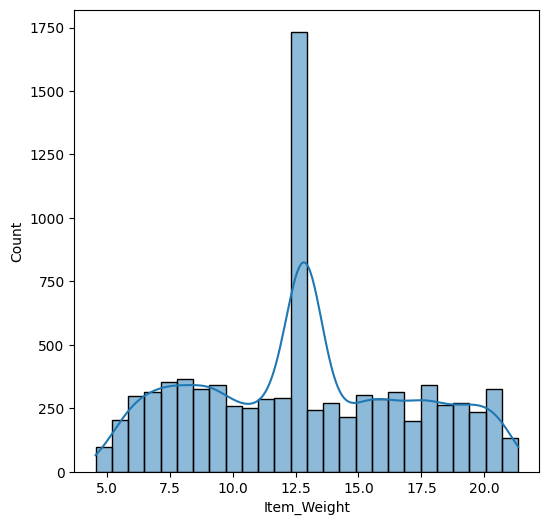

In [15]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.histplot(df["Item_Weight"], kde=True)
plt.show()

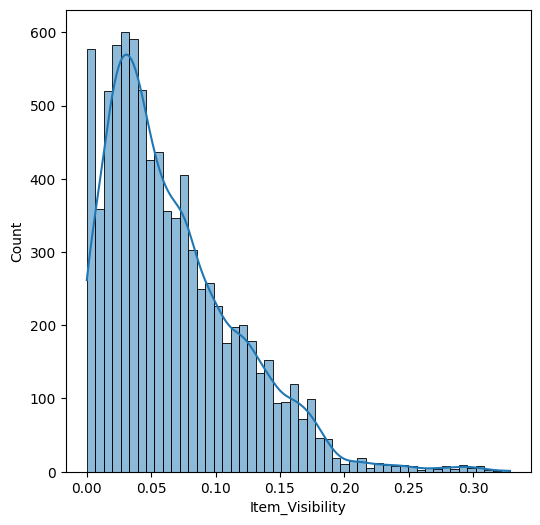

In [16]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.histplot(df["Item_Visibility"], kde=True)
plt.show()

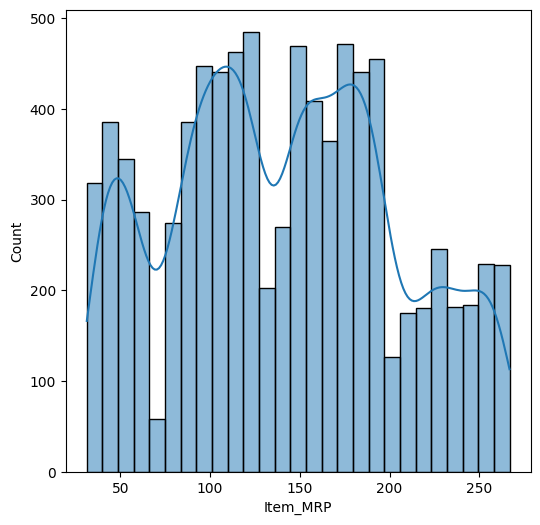

In [17]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.histplot(df["Item_MRP"], kde=True)
plt.show()

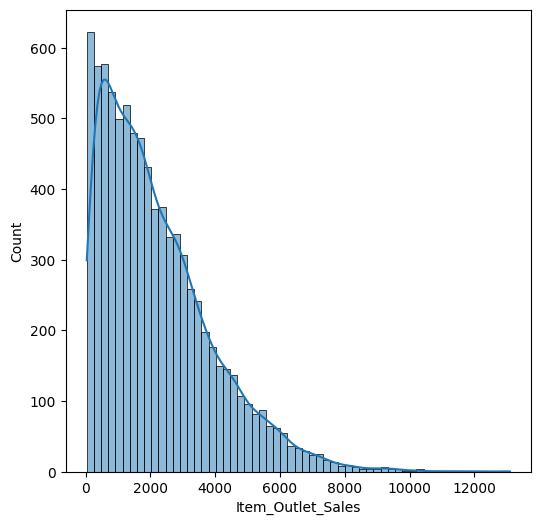

In [18]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.histplot(df["Item_Outlet_Sales"], kde=True)
plt.show()

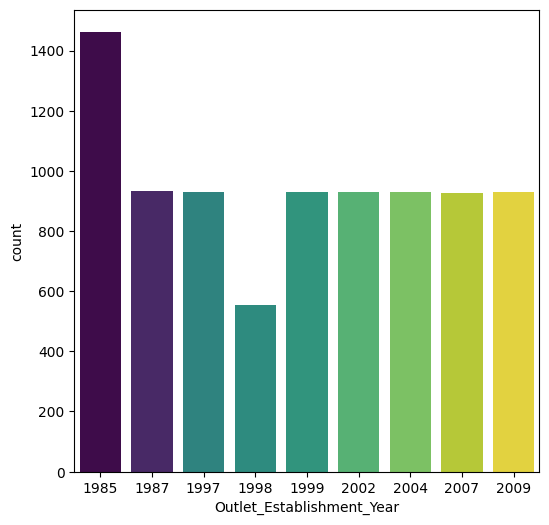

In [19]:
# using a count plot for the outlet establishment column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", hue="Outlet_Establishment_Year", data=df, palette="viridis", legend=False)
plt.show()

### Categorical features

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

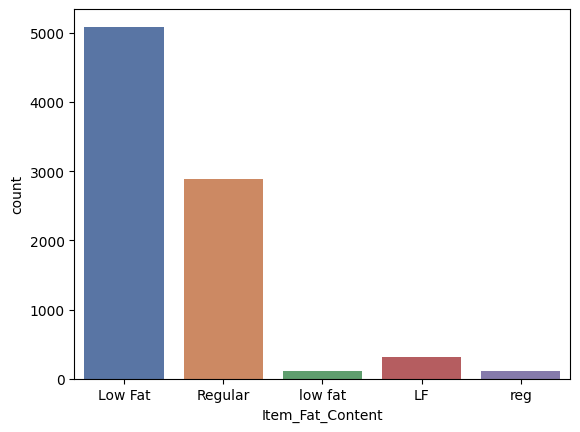

In [20]:
# Item_Fat_Content
sns.countplot(x="Item_Fat_Content", hue="Item_Fat_Content", data=df, palette="deep", legend=False)

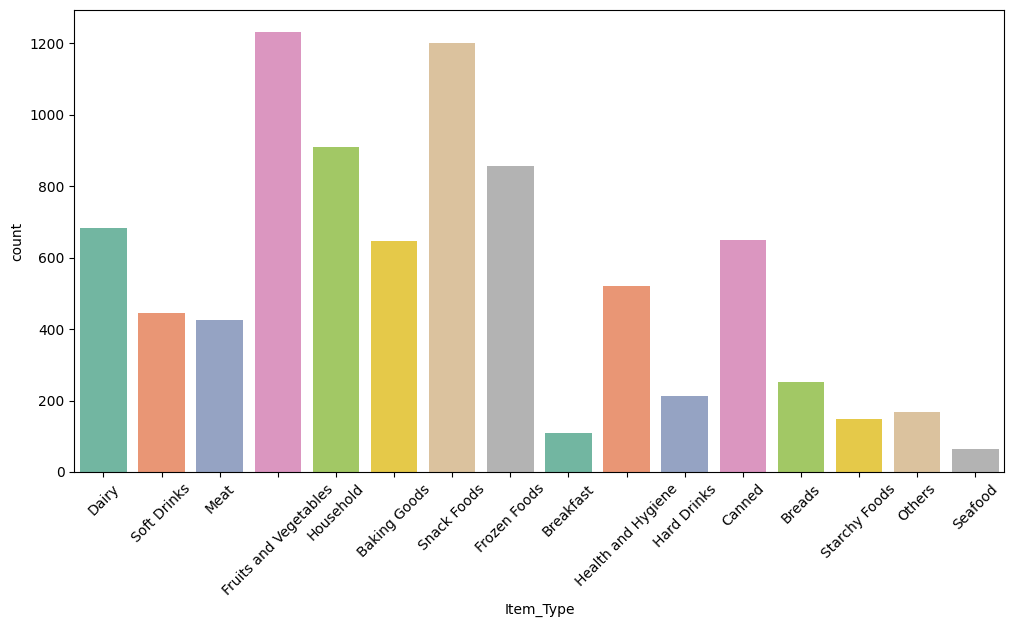

In [21]:
# create count plot for item type column
plt.figure(figsize=(12, 6))
sns.countplot(x="Item_Type", hue="Item_Type", data=df, palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.show()

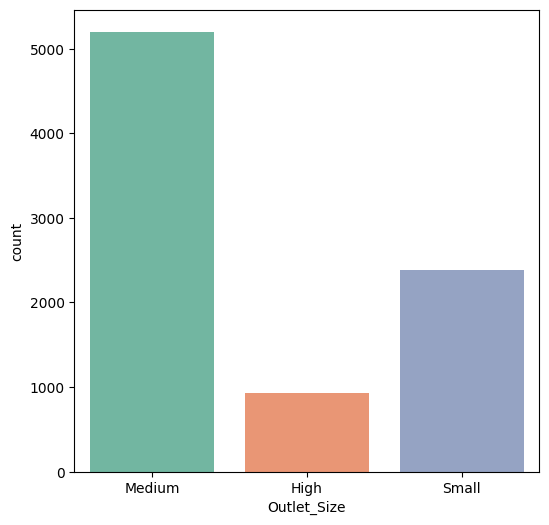

In [22]:
# create count plot for item type column
plt.figure(figsize=(6, 6))
sns.countplot(x="Outlet_Size", hue="Outlet_Size", data=df, palette="Set2", legend=False)
plt.show()

## Data Preprocessing

In [23]:
#convert categorical features using label encoding
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [24]:
# Replace values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [25]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Label Encoding

In [26]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Train Test Split and Model Training

In [28]:
# split our dataset to X and y features
from sklearn.model_selection import train_test_split
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df["Item_Outlet_Sales"]

In [29]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X.shape, X_train.shape, X_test.shape

((8523, 11), (6818, 11), (1705, 11))

In [31]:
# initialize our model
model = XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred= model.predict(X_test)

In [40]:
# calculate the R score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6076451207781826


### Hyperparameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Optimized R² Score:", r2)


Optimized R² Score: 0.6076451207781826
